# Section 2 - Line Chart

In [1]:
# import minimum required packages
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
# we need reproducable random selection state
np.random.seed(42)

# Let's define X and Y
x = np.linspace(10, 24, 10)
y = np.random.randn(10)

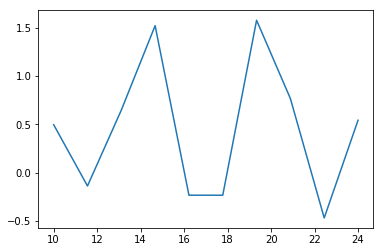

In [3]:
fig, ax = plt.subplots()
lines = ax.plot(x, y)

In [5]:
import pandas as pd
from pandas import DataFrame

In [6]:
# Pass your path to iris.csv
# it may be different than below
df = pd.read_csv('Data/iris.csv')

# Let's take a look at the dataframe
df.head()

,Sepal length,Sepal width,Petal length,Petal width,Class,Type
0,5.1,3.5,1.4,0.2,0,Setosa
1,4.9,3.0,1.4,0.2,0,Setosa
2,4.7,3.2,1.3,0.2,0,Setosa
3,4.6,3.1,1.5,0.2,0,Setosa
4,5.0,3.6,1.4,0.2,0,Setosa


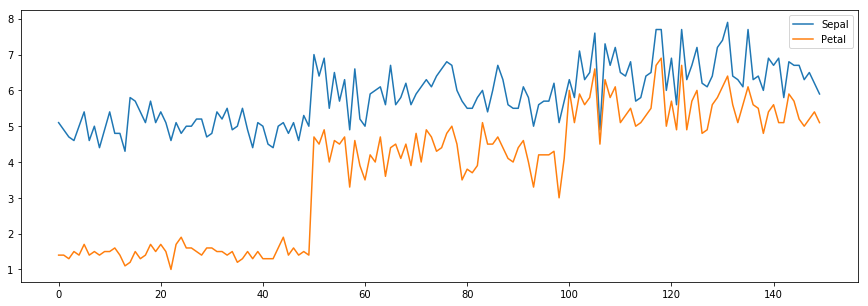

In [7]:
# Time for our first chart from the dataframe
fig, ax = plt.subplots(figsize=(15,5))

ax.plot('Sepal length', data=df, label='Sepal')

# Let's add another line to the same axes
ax.plot('Petal length', data=df, label='Petal')

ax.legend()

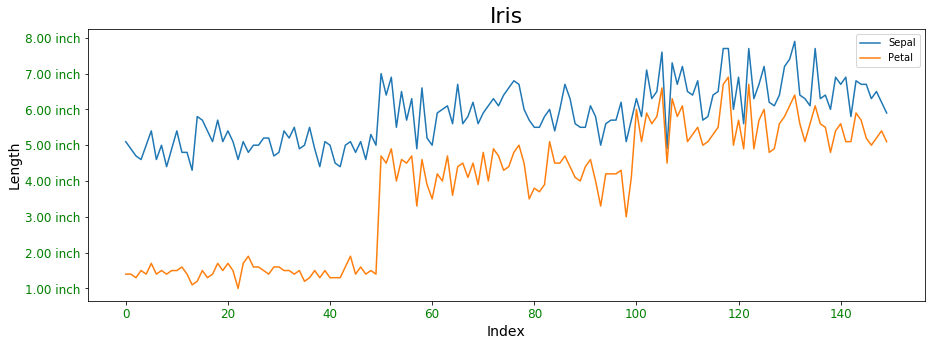

In [8]:
# Add a title
ax.set_title('Iris', size=22)

# add x and y axis labels

ax.set_xlabel('Index', size=14)
ax.set_ylabel('Length', size=14)


# Let's change the ticks little
ax.tick_params(axis='both', labelsize=12, labelcolor='green' )


# Let us also add append the word 'inch' to the Y ticks
# We will import StrMethodFormatter
from matplotlib.ticker import StrMethodFormatter

# Instantiate it with the format we need
mft = StrMethodFormatter("{x:.2f} inch")


# Let's apply it
ax.yaxis.set_major_formatter(mft)


fig

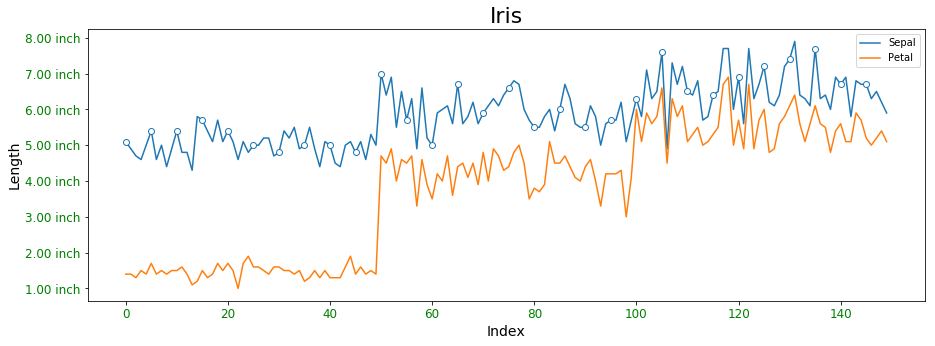

In [9]:
# Let us add marker to the first line
line1 = ax.lines[0]

line1.set_marker('o')
line1.set_markevery(5)
line1.set_markerfacecolor('white')

'''
alternatively you can do the following
line1.set(marker='o', markevery=5, markerfacecolor='white)

'''

fig

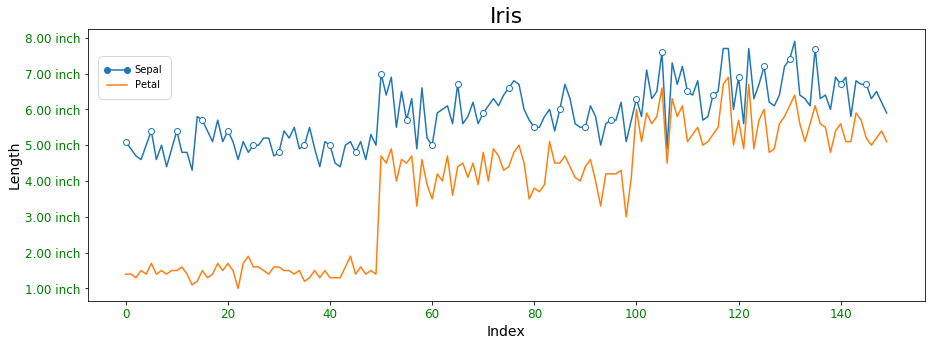

In [10]:
'''
Let's also change the legend
'''

legend = ax.legend_

fl = legend.get_lines()[0]

fl.set_marker('o')

legend.set_bbox_to_anchor([0.1, 0.9])
legend.legendPatch.set_boxstyle('round, pad=0.5')

fig

Imagine, we also want to annotate the Min and Max values of Petal length. But first, let's find the at which X values Petal length obtains the minimum and maximum.

In [11]:
val = df['Petal length'].values

p_min = val.min()
p_max = val.max()

x_min = val.argmin()
x_max = val.argmax()

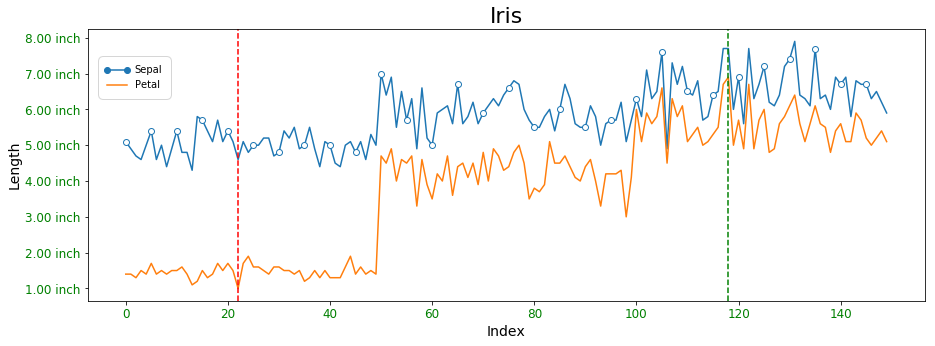

In [12]:
# Let's draw vertical lines just at min and max
# Just cosmetic touches, so to say

ax.axvline(x_min, color='red', ls='dashed')
ax.axvline(x_max, color='green', ls='dashed')

fig

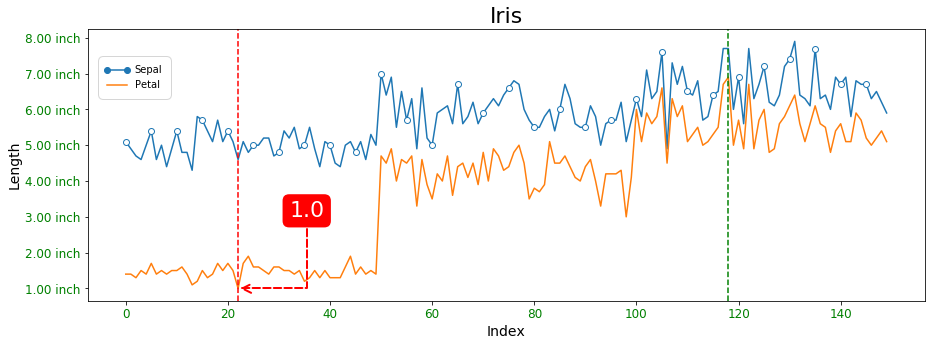

In [13]:
# Time to add annotation

# We will start by annotating min value
min_annotation = ax.annotate(str(p_min), 
                             xy = (x_min, p_min), 
                             xytext=(x_min+10, p_min+2), 
                            arrowprops=dict(arrowstyle='->'))

min_annotation.set(size=22, color='w')
min_annotation.set_bbox(dict(facecolor='r', boxstyle='round, pad=0.3', lw=0))

# Let's tickle the arrow little
min_annotation.arrow_patch.set_connectionstyle('angle, angleA=-90')
min_annotation.arrow_patch.set_lw(2)
min_annotation.arrow_patch.set_linestyle('dashed')
min_annotation.arrow_patch.set_color('red')

fig

Let's also add one for the max value of Petal length

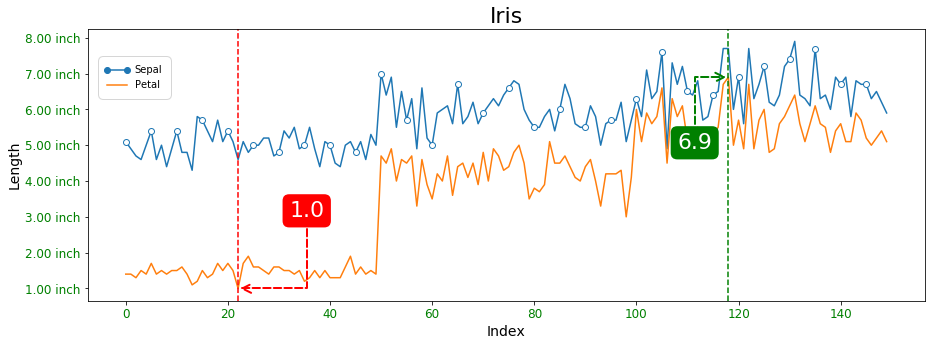

In [14]:
max_annotation = ax.annotate(str(p_max),
                            xy=(x_max, p_max),
                            xytext=(x_max-10, p_max-2),
                            arrowprops=dict(arrowstyle='->'))


max_annotation.set(color='w', size=22)
max_annotation.set_bbox(dict(facecolor='green', lw=0, boxstyle='round, pad=0.3'))

max_annotation.arrow_patch.set_connectionstyle('angle, angleA=90')
max_annotation.arrow_patch.set_color('green')
max_annotation.arrow_patch.set_linestyle('dashed')
max_annotation.arrow_patch.set_lw(2)

fig

Alright, we are done with customizing the line chart. And you can do it endlessly. There are so parameters and even more combinations. 

Let's save this image to your hard drive

In [15]:
fig.savefig('line-chart.png', dpi=350)

I should also mention that pandas well integrates with Matplotlib. For example.

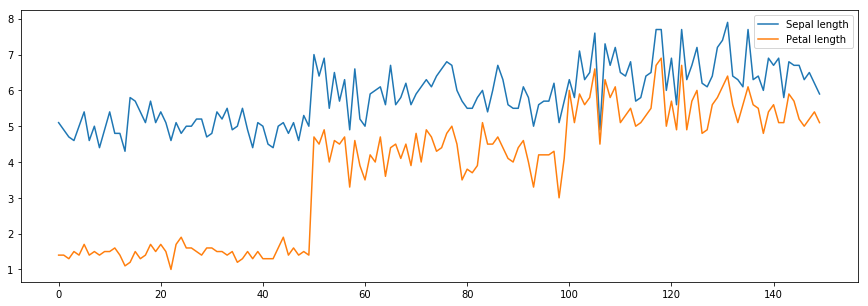

In [16]:
# let's make another plot
fig2, ax2 = plt.subplots()


# df.plot.line(y='Sepal length', ax=ax2)
# by default, dataframe index is used as X 
# Which you can easily set to something else
# if need be

# I will not define X, because we want to use 
# the dataframe index as our X ticks

# df.plot.line(y='Petal length', ax=ax2)
# OR

df[['Sepal length','Petal length']].plot.line(ax=ax2)

fig2.set_size_inches(15,5)

Alright, that's all about line charts. If you have any questions, do let me know and bye for now.